<a href="https://colab.research.google.com/github/vmagal1/basefinalebac/blob/main/Mod13_Tarefa01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('previsao_de_renda .csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.
    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [ ]:
y, x = ps.dmatrices('np.log(renda) ~  sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia', data=df, return_type='dataframe')
x

,Intercept,sexo[T.M],posse_de_veiculo[T.True],posse_de_imovel[T.True],C(tipo_renda)[T.Bolsista],C(tipo_renda)[T.Empresário],C(tipo_renda)[T.Pensionista],C(tipo_renda)[T.Servidor público],C(educacao)[T.Pós graduação],C(educacao)[T.Secundário],...,C(estado_civil)[T.Viúvo],C(tipo_residencia)[T.Casa],C(tipo_residencia)[T.Com os pais],C(tipo_residencia)[T.Comunitário],C(tipo_residencia)[T.Estúdio],C(tipo_residencia)[T.Governamental],qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.0,6.602740,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,7.183562,2.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,0.838356,2.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30.0,4.846575,3.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0,4.293151,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,32.0,9.849315,2.0
14995,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,48.0,13.887671,1.0
14997,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,45.0,7.832877,2.0
14998,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0,4.298630,2.0


In [ ]:
reg = smf.ols('np.log(renda) ~  sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia', data=df, return_type='dataframe')
reg = reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:16:02   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['return_type']
  warnings.warn(msg, ValueWarning)


In [ ]:
# Podemos notar que ha uma relação entre a renda e a quantidade de filhos, como o coeficiente esta negativo, significa que quanto mais filhos tem, menor é a renda
# Alem disso, a posse de veiculo tambem esta relacionada com a renda

<Axes: xlabel='qtd_filhos', ylabel='renda'>

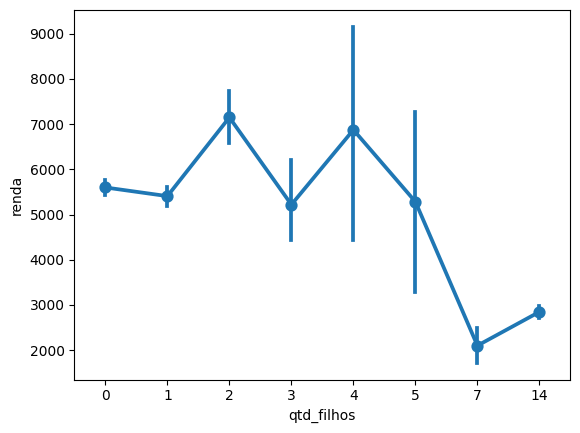

In [ ]:
sns.pointplot(x='qtd_filhos', y='renda', data=df)

<Axes: xlabel='educacao', ylabel='renda'>

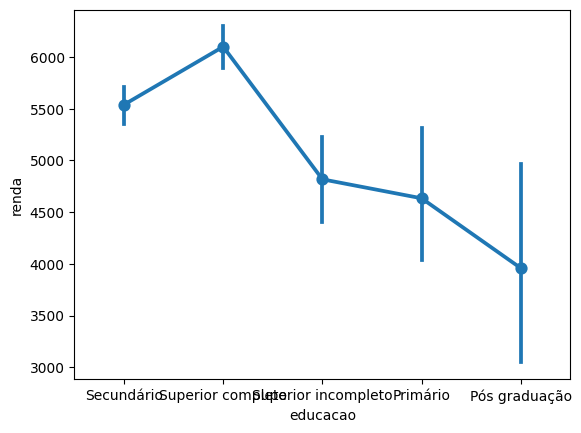

In [ ]:
sns.pointplot(x='posse_de_veiculo', y='renda', data=df)

In [ ]:
# Removendo a variavel menos significante (Educacao)
reg = smf.ols('np.log(renda) ~  sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia', data=df, return_type='dataframe')
reg = reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     340.0
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:17:30   Log-Likelihood:                -13601.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12406   BIC:                         2.740e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['return_type']
  warnings.warn(msg, ValueWarning)


In [ ]:
# Aparentemente o modelo piorou, o R2 reduziu um pouco sem a variavel